In [52]:
import pandas as pd
import numpy as np
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from copy import deepcopy
sns.set()
import math

In [53]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [54]:
print(dataset.shape)

(400, 5)


In [55]:
newdata=dataset.iloc[:,2:]
newdata.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [56]:
newdata.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [57]:
print(newdata.shape)

(400, 3)


In [58]:
from sklearn.cluster import KMeans

In [73]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
#print (len(kmeans_clusters_))
kmeans.cluster_centers_

array([[3.76737589e+01, 3.47872340e+04, 3.19148936e-01, 1.23404255e+00],
       [4.27837838e+01, 1.25310811e+05, 8.51351351e-01, 1.08108108e+00],
       [3.55891892e+01, 7.41567568e+04, 1.89189189e-01, 2.12432432e+00]])

In [75]:
print(kmeans.labels_)
print("Length:",len(kmeans.labels_))

[0 0 0 2 2 2 2 1 0 2 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 0 0
 0 2 0 0 0 1 0 2 0 2 0 1 2 0 0 2 0 2 2 0 2 0 1 0 2 2 1 2 2 0 2 2 2 2 0 0 1
 0 1 0 0 2 0 2 0 0 2 2 1 2 2 2 0 2 1 0 0 2 0 0 1 2 0 2 2 2 1 0 2 0 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 2 2 0 2 2 2 2 2 1 2 0 2 2 2 2 0 2 2 0
 2 2 0 0 2 0 0 0 2 2 0 1 1 2 0 0 2 2 2 2 1 0 2 1 1 0 2 0 0 0 0 0 0 2 1 0 2
 2 2 0 2 0 2 0 0 2 2 0 2 0 2 0 0 2 1 2 1 0 1 1 1 0 2 1 0 2 0 1 2 2 2 1 2 2
 1 1 2 0 1 1 2 2 1 0 1 2 1 2 2 2 2 1 1 2 2 1 2 1 0 1 0 2 0 0 1 1 0 2 2 2 2
 1 2 1 1 2 2 1 2 2 1 2 1 2 0 1 0 2 2 2 0 0 2 2 2 0 1 2 2 1 2 2 1 2 0 2 2 2
 2 1 2 1 0 2 1 2 2 0 1 1 1 0 2 2 0 1 2 2 1 2 0 2 1 2 0 0 1 2 2 2 1 1 0 1 2
 2 2 0 1 2 2 1 1 2 2 0 1 2 2 1 2 2 1 2 2 2 2 0 2 2 2 0 1 0 0 2 1 0 0 2 2 0
 0 2 2 1 2 0 2 0 2 0 2 0 1 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0]
Length: 400


In [76]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 141, 1: 74, 2: 185}


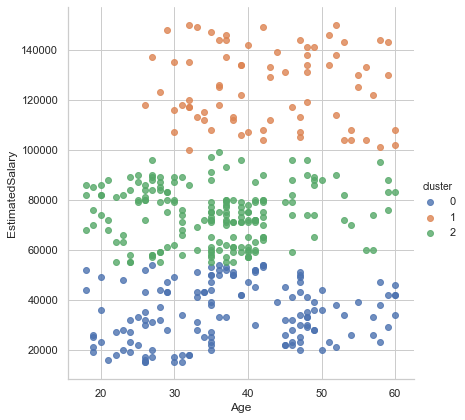

In [81]:
# plot the data
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','EstimatedSalary',newdata,hue='cluster',
           size=6,aspect=1,fit_reg=False)